In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
plt.style.use('fivethirtyeight')

df = pd.read_excel(r'D:\Backup 14.03.2021\Desktop\Imarticus Post\Online PGA 20\ML Advanced\Analytics in Ecommerce Project\Dataset\Sample - Superstore.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [3]:
#Data Clean
df.drop_duplicates(inplace=True)
df['order_year'] = df['Order Date'].dt.year
df['order_month'] = df['Order Date'].dt.month
df['order_day'] = df['Order Date'].dt.day
df['order_weekday'] = df['Order Date'].dt.weekday+1
df['order_year_month'] = df['Order Date'].dt.strftime('%Y-%m')
df['ship_days'] = (df['Ship Date']-df['Order Date']).dt.days

df['Cost'] = df['Sales'] - df['Profit']
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_day,order_weekday,order_year_month,ship_days,Cost
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8,2,2016-11,3,220.0464
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8,2,2016-11,3,512.3580
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12,7,2016-06,4,7.7486
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11,7,2015-10,7,1340.6085
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11,7,2015-10,7,19.8516


In [4]:
print('The most recent Order Date is:',df['Order Date'].max())
print('The first Order Date is:',df['Order Date'].min())

The most recent Order Date is: 2017-12-30 00:00:00
The first Order Date is: 2014-01-03 00:00:00


In [5]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,order_year,order_month,order_day,order_weekday,ship_days,Cost
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,2015.722233,7.809686,15.468481,4.206324,3.958175,201.201105
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,2014.000000,1.000000,1.000000,1.000000,0.000000,0.554400
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,2015.000000,5.000000,8.000000,2.000000,3.000000,12.688200
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,2016.000000,9.000000,15.000000,5.000000,4.000000,41.664000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,2017.000000,11.000000,23.000000,6.000000,5.000000,182.226300
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,2017.000000,12.000000,31.000000,7.000000,7.000000,24449.558400
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,1.123555,3.284654,8.748327,2.122925,1.747567,550.839414


# 1. Geographical Dimension

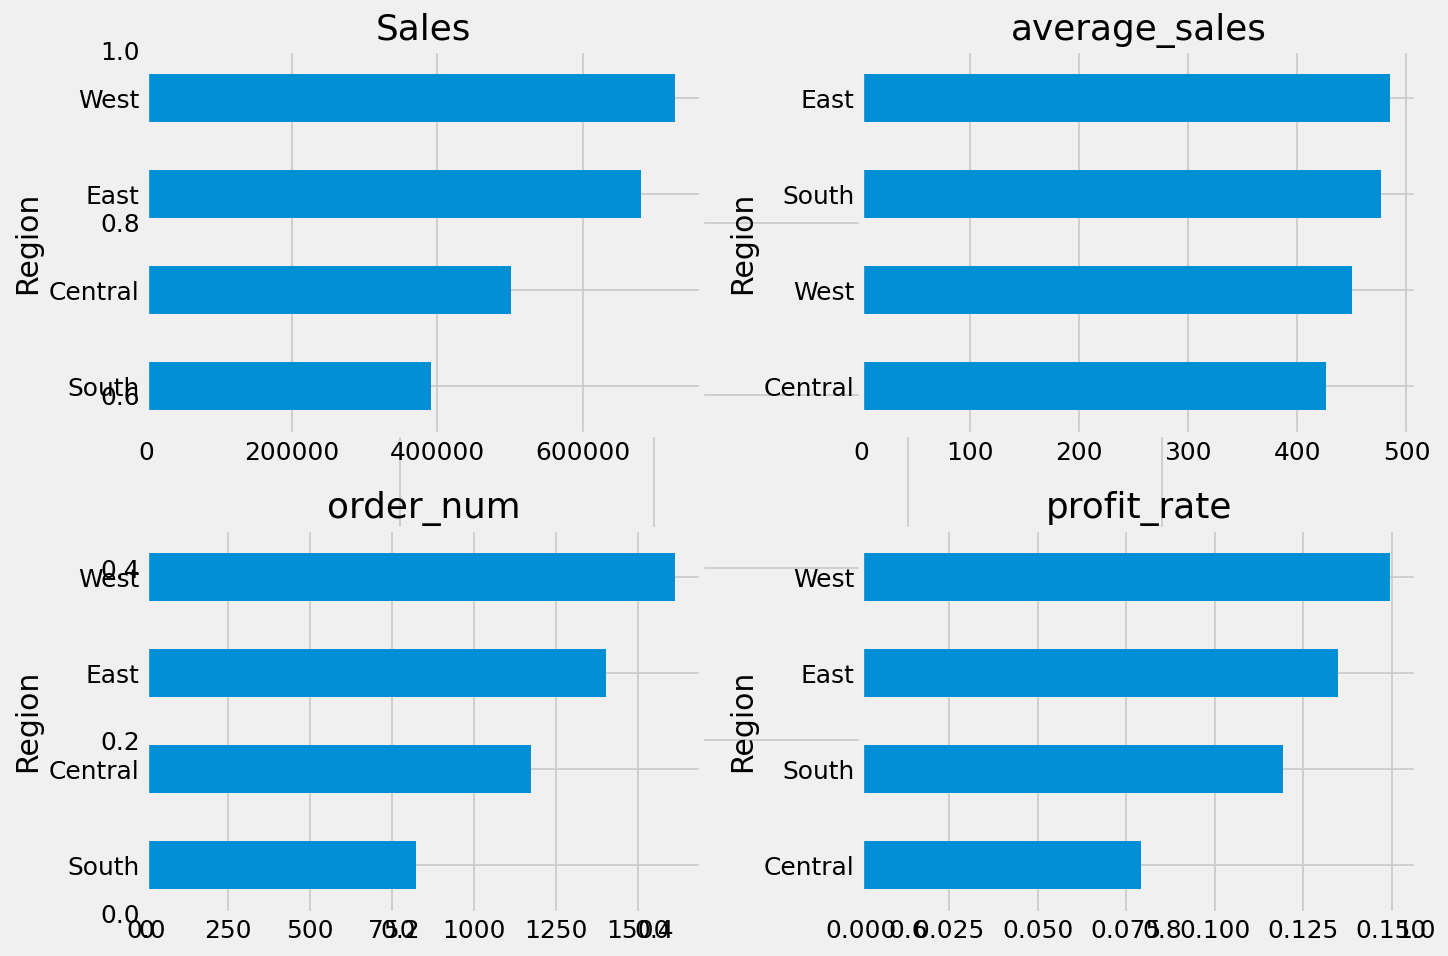

In [6]:
#Analyze sales, unit price, order quantity, and profit rate in each region

df_region = df.groupby('Region').agg({'Sales':'sum','Order ID':'nunique','Profit':'sum'})
df_region['average_sales'] = df_region['Sales']/df_region['Order ID']
df_region['profit_rate'] = df_region['Profit']/df_region['Sales']
df_region.rename(columns={'Order ID':'order_num'},inplace=True)

fig, ax = plt.subplots(dpi=128, figsize=(12, 8))
for i, col in enumerate(['Sales', 'average_sales', 'order_num', 'profit_rate'],1):
    plt.subplot(2,2,i)
    df_region[col].sort_values().plot(kind='barh')
    plt.title(col)
plt.tight_layout()
plt.show()

# 2. Time Dimension

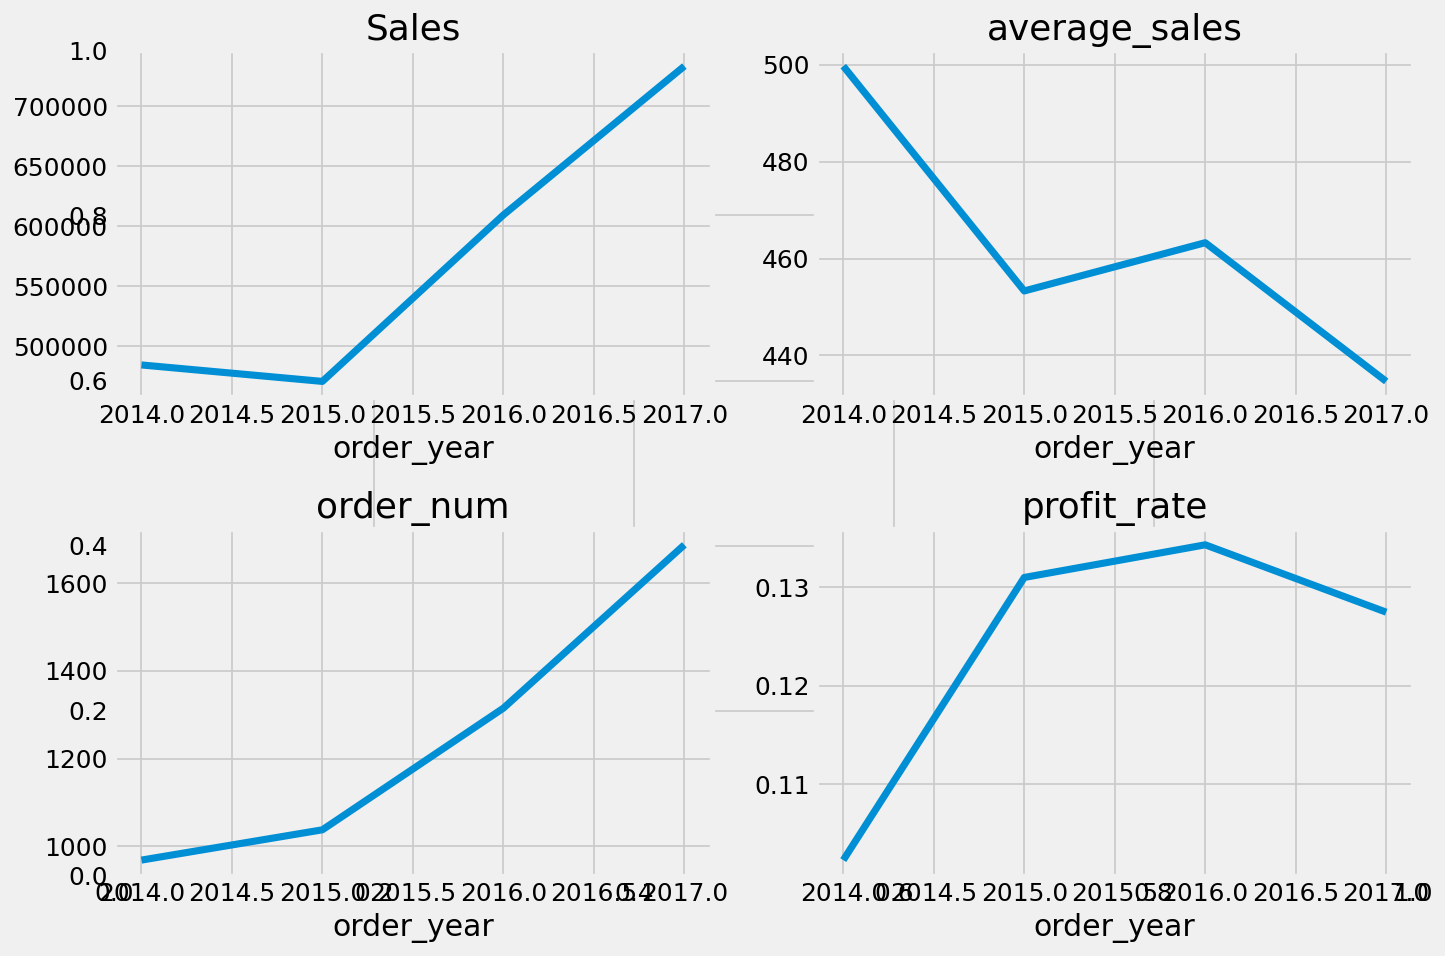

In [7]:
df_year = df.groupby('order_year').agg({'Sales': 'sum','Order ID': 'nunique','Profit': 'sum'})
df_year['average_sales'] = df_year['Sales'] / df_year['Order ID']
df_year['profit_rate'] = df_year['Profit'] / df_year['Sales']
df_year.rename(columns={'Order ID': 'order_num'}, inplace=True)

fig, ax = plt.subplots(dpi=128, figsize=(12, 8))
for i, col in enumerate(['Sales', 'average_sales', 'order_num', 'profit_rate'],1):
    plt.subplot(2,2,i)
    df_year[col].plot(kind='line')
    plt.title(col)
plt.tight_layout()
plt.show()

In [8]:
df_year

,Sales,order_num,Profit,average_sales,profit_rate
order_year,,,,,
2014,484247.4981,969,49543.9741,499.739420,0.102311
2015,470532.5090,1038,61618.6037,453.306849,0.130955
2016,609205.5980,1315,81795.1743,463.274219,0.134265
2017,733215.2552,1687,93439.2696,434.626707,0.127438


From this result, we can see that the company's sales, order quantity and profit increased significantly in 2015, 2016 and in 2017, although sales and order quantity continued to grow, the profit rate was slightly lower than in 2017. Therefore, it is necessary to further analyze the sales situation in 2017, find out the reasons and propose improvement measures to improve the company's profit rate. Here are some possible reasons:

Increased market competition: More competitors may enter the market, leading to price competition and reduced profit rate.
Product Pricing Strategy: The company's product pricing strategy may need to be adjusted to make it more consistent with market demand while maintaining reasonable profit rate.
Insufficient cost control: The company may not be effectively controlling costs, such as raw material costs or operating costs, etc., which may lead to lower profit rate

Next, we focus on the comparison of profit rate in 2016 and 2017

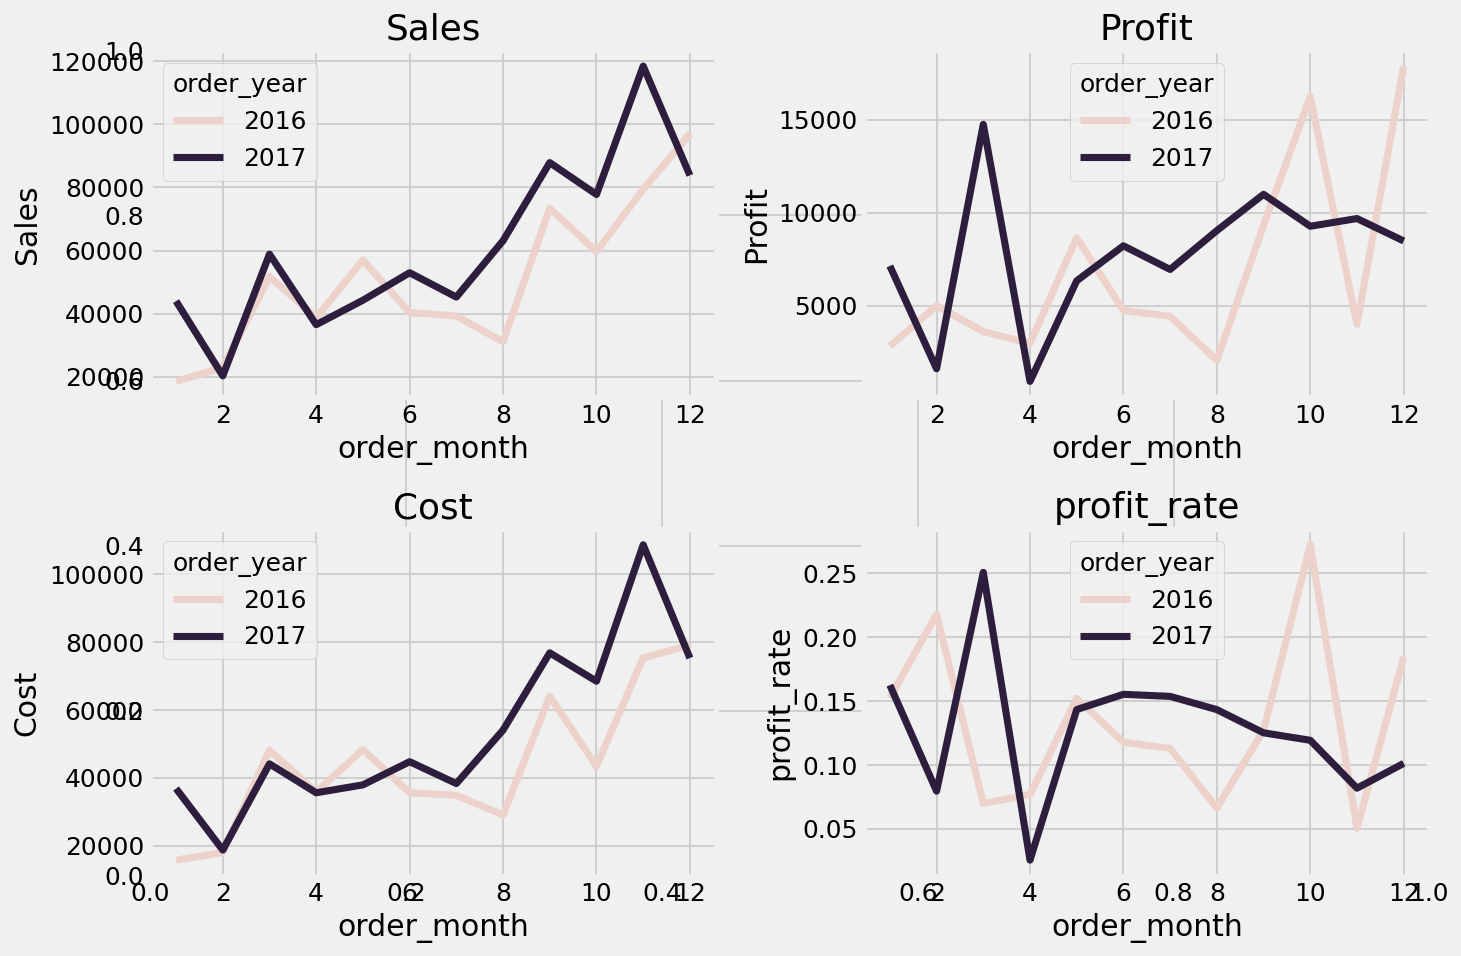

In [9]:
df_month_1617 = df[df['order_year'].isin([2016,2017])].groupby(['order_year','order_month']).agg({'Sales': 'sum','Profit': 'sum','Cost': 'sum'})
df_month_1617['profit_rate'] = df_month_1617['Profit'] / df_month_1617['Sales']
df_month_1617.reset_index(inplace=True)

fig, ax = plt.subplots(dpi=128, figsize=(12, 8))
for i, col in enumerate(['Sales', 'Profit', 'Cost', 'profit_rate'],1):
    plt.subplot(2,2,i)
    sns.lineplot(x='order_month', y=col, hue='order_year', data=df_month_1617)
    plt.title(col)
plt.tight_layout()
plt.show()

From the figure, we can see that the profit rate dropped sharply from February to March and October to November 2016, and the profit rate also dropped sharply from March to April 2017 and October to December. The reasons for the decline vary. The reason for the decline in profit margin in 2016 was mainly due to insufficient cost control, while the reason in 2017 was the decline in sales, which may be caused by intensified market competition. Next we can further analyze the reasons for the decline in sales from March to April 2017. It can be seen that sales also declined at this time in 2016. The overall sales in 2017 are still higher than in 2016, but the costs in each month are basically higher than in 2016. Therefore, it can be speculated that the sales decline in 2017 was mainly due to insufficient cost control.

The following suggestions can be given:

Strengthen cost control: Since the increase in costs is the main reason for the decline in profit margins, companies need to strengthen cost control, such as being more careful in the procurement process and reasonably controlling inventory, so as to reduce costs and increase profit margins.
Increased sales: While overall sales in 2018 were higher than in 2017, some months saw sales declines. Therefore, companies need to further increase sales by increasing marketing activities, expanding product lines, improving customer service, etc. to attract more customers.
Adjust sales strategies: Generally speaking, the traditional sales peak seasons in the United States include Thanksgiving, Christmas and New Year holidays, usually in November and December. For the off-season, companies can consider adopting promotional strategies, such as providing discounts, gifts, etc., to promote sales. In addition, sales strategies can be adjusted to balance sales between off-season and peak seasons, such as launching new products during the off-season to attract more consumers

# 3. Product Dimension

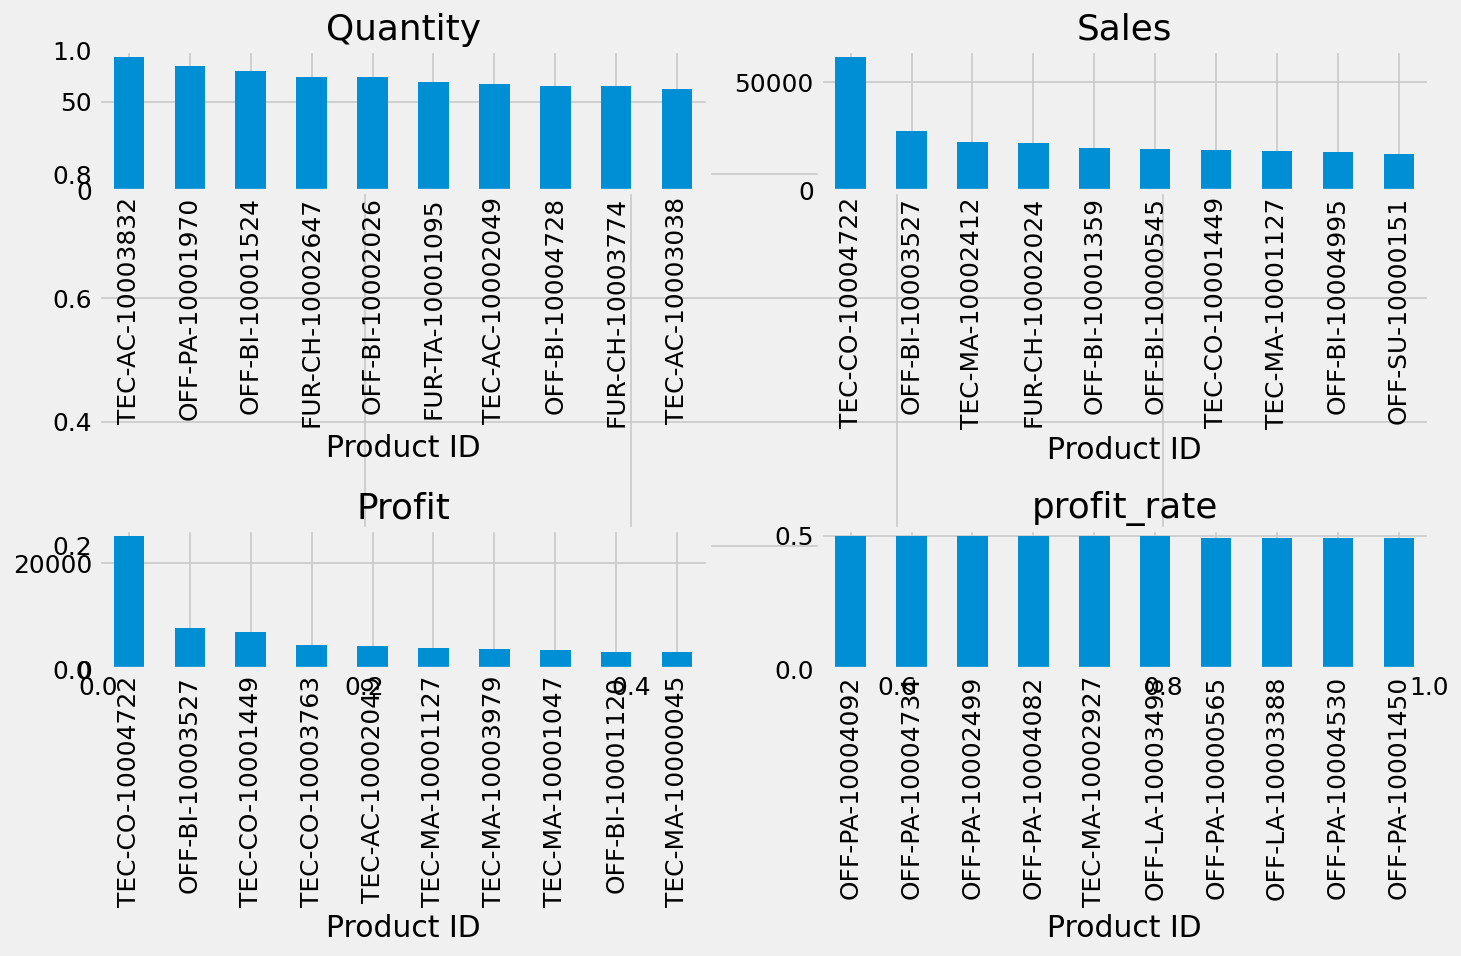

In [10]:
df_product = df.groupby('Product ID').agg({'Sales':'sum','Profit':'sum','Cost':'sum','Quantity':'sum'})
df_product['profit_rate'] = df_product['Profit'] / df_product['Sales']

fig, ax = plt.subplots(dpi=128, figsize=(12, 8))
for i, col in enumerate(['Quantity', 'Sales', 'Profit', 'profit_rate'],1):
    plt.subplot(2,2,i)
    df_product[col].sort_values(ascending=False)[0:10].plot(kind='bar')
    plt.title(col)
plt.tight_layout()
plt.show()

Based on the analysis results, we can see the top 10 products in terms of sales volume, sales volume, profit and profit margin, and we can see the performance of each product on these four indicators. Based on this data, we can make the following recommendations:

Strengthen the production and sales management of the top 10 products in sales volume, sales volume and profit margin to maintain their leading position while increasing their market share.

Conduct more in-depth market research on the top 10 products in terms of sales volume, sales volume and profit margin to understand consumer needs and preferences to further optimize product design and marketing strategies.

For other underperforming products, optimize and adjust production and sales management to improve their competitiveness and profitability in the market.

Focus on products with low profit margins and analyze costs and selling prices to find ways to reduce costs or increase selling prices to increase overall profit margins.

Timely adjust and optimize product lines, focus more resources and energy on high-performing products, and improve the overall profitability of the company.

At the same time, we pay attention to changes in the off-season and peak sales seasons, and make timely market adjustments and product optimization to adapt to market changes and changes in consumer demand

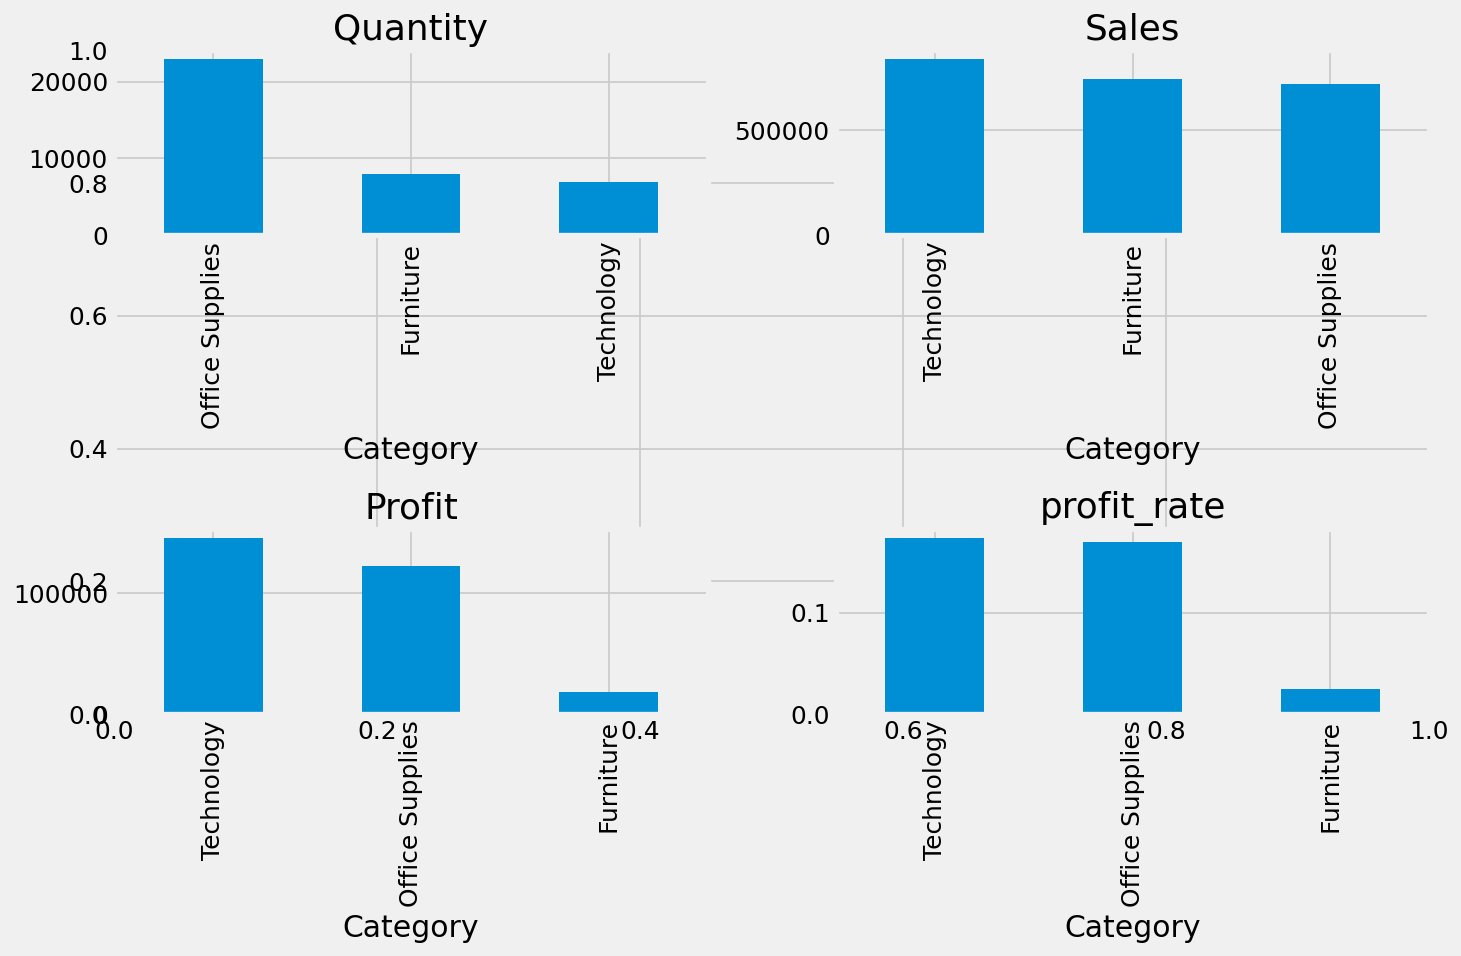

In [11]:
df_category = df.groupby('Category').agg({'Sales': 'sum','Profit': 'sum','Quantity': 'sum'})
df_category['profit_rate'] = df_category['Profit'] / df_category['Sales']

fig, ax = plt.subplots(dpi=128, figsize=(12, 8))
for i, col in enumerate(['Quantity', 'Sales', 'Profit', 'profit_rate'],1):
    plt.subplot(2,2,i)
    df_category[col].sort_values(ascending=False).plot(kind='bar')
    plt.title(col)
plt.tight_layout()
plt.show()

The following conclusions and suggestions can be drawn from the above figure:

The sales volume of technology products is relatively low, but the sales, profit and profit margin are relatively high. This may be because technology products tend to be more expensive and have relatively large profit margins. Therefore, although the sales volume is small, they can still bring in Not a bad profit. Based on this situation, companies can further analyze the market potential of technology products, such as whether more consumers are interested in these products, or whether sales can be increased through promotions and other methods. Product innovation and marketing can be used to attract more consumers to purchase technology products. In addition, you can also consider increasing sales channels for technology products, such as online sales.

Office products have the highest sales volume, but sales are relatively low and profit margins are relatively high. You can focus on maintaining sales of office products while considering whether to raise prices appropriately to increase sales. You can focus on market competition, such as whether there is an influx of competitors, and adjust product prices and other strategies to increase sales and profit margins.

Furniture products have poor profit and profit margin performance, so we can focus on cost control, such as optimizing procurement costs, production costs, and transportation costs, to improve their profit margins. In addition, product innovations for furniture products can be considered to attract more consumers to purchase furniture products

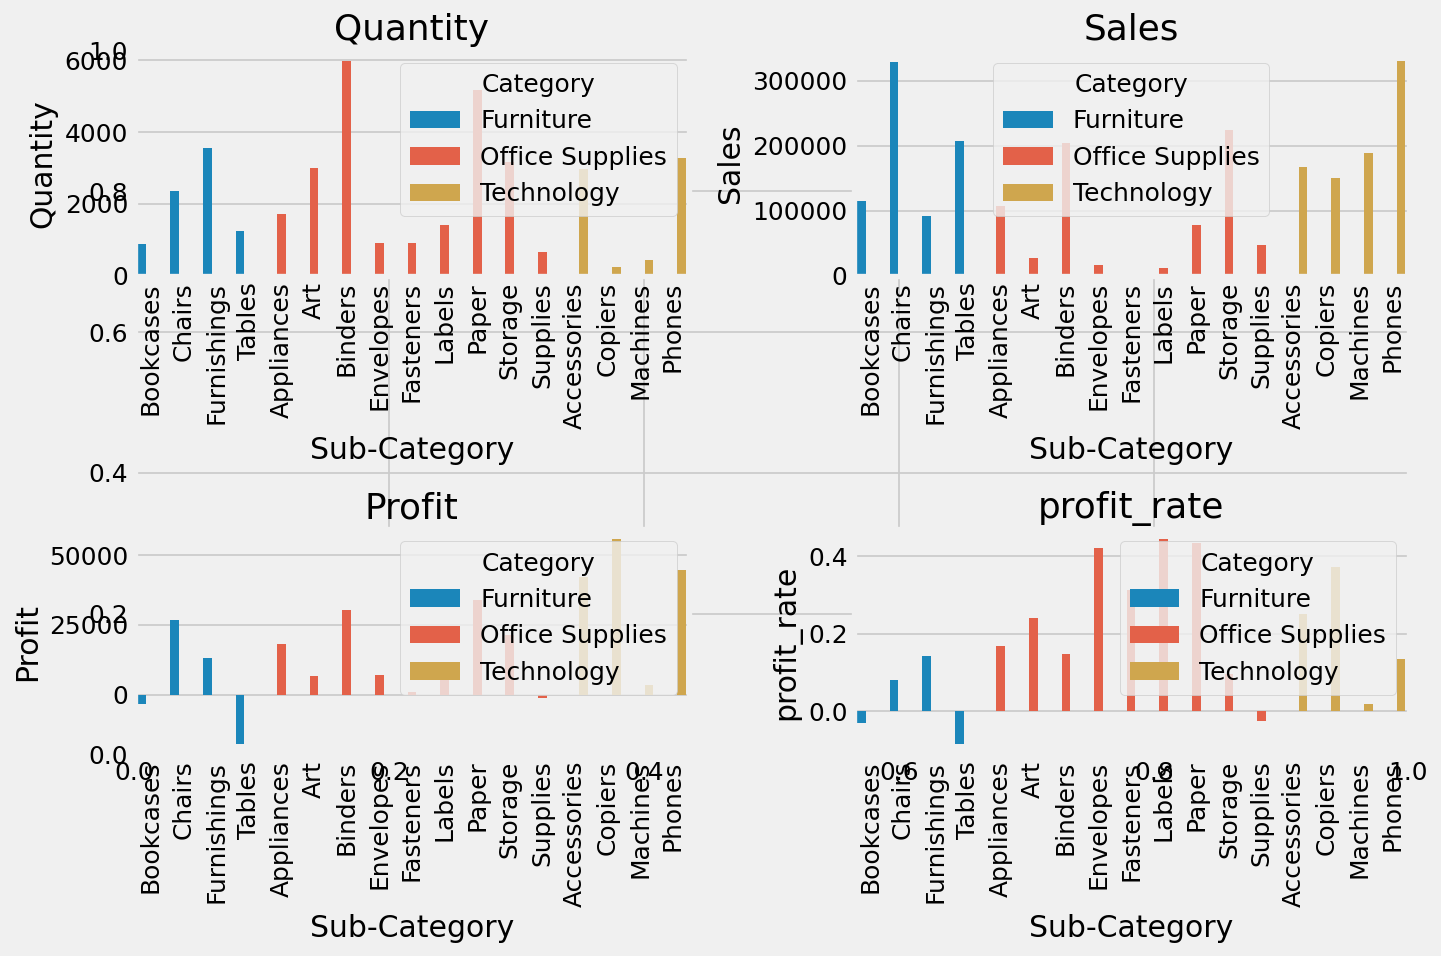

In [12]:
df_subcategory = df.groupby(['Category','Sub-Category']).agg({'Sales':'sum','Quantity':'sum','Profit':'sum'})
df_subcategory['profit_rate'] = df_subcategory['Profit'] / df_subcategory['Sales']
df_subcategory = df_subcategory.reset_index()
df_subcategory['Sub-Category'] = df_subcategory['Sub-Category'].str.replace('-', '_')

fig, ax = plt.subplots(dpi=128, figsize=(12, 8))
for i, col in enumerate(['Quantity', 'Sales', 'Profit', 'profit_rate'],1):
    plt.subplot(2,2,i)
    sns.barplot(x='Sub-Category', y=col, hue='Category', data=df_subcategory)
    plt.title(col)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

As can be seen from the figure above, among furniture products, the profit margins of tables is negative, indicating that this type of products do not bring profits, while the profit margins of chairs and home decoration are relatively high. Within the office supplies category, paper and labels have the highest profit margins, while storage equipment has the lowest profit margins. Among technology products, copiers and accessories have the highest profit margins, while machines have the lowest.

From this data, we can find that the profit margins of products in different categories and subcategories vary greatly. Companies can use this information to optimize their product lines and increase profit margins. For example, furniture products such as tables do not bring profits. Companies can consider reducing the production of these products while strengthening the production and sales of chairs and home decoration products. For another example, in office supplies, storage equipment has a low profit margin. Enterprises can consider optimizing the cost structure or adjusting pricing strategies to increase their profit margins

In [18]:
df_RFM = df.groupby('Customer Name').agg({'Order Date':lambda x:(df['Order Date'].max()-x.max()).days,
                                 'Order ID':'nunique',
                                 'Sales':'sum',
                                 'Profit':'sum'})
df_RFM.rename(columns={'Order Date':'Recency','Order ID':'Frequency','Sales':'Monetary'},inplace=True)
DiffYears = df.groupby('Customer Name').agg({'Order Date':lambda x: x.dt.year.max()-x.dt.year.min()+1}).rename(columns={'Order Date':'DiffYears'}).DiffYears
df_RFM['Frequency'] = df_RFM['Frequency'] / DiffYears
df_RFM.head()

,Recency,Frequency,Monetary,Profit
Customer Name,,,,
Aaron Bergman,415,1.000000,886.156,129.3465
Aaron Hawkins,12,1.750000,1744.700,365.2152
Aaron Smayling,88,1.750000,3050.692,-253.5746
Adam Bellavance,54,2.666667,7755.620,2054.5885
Adam Hart,34,2.500000,3250.337,281.1890


# 4. Customer Dimension
4.1 RFM

In the customer dimension, the commonly used model is the RFM model, namely Recency, Frequency, and Monetary. Recency represents the time interval between the customer's most recent purchase and the current time, Frequency represents the number of customer purchases, and Monetary represents the amount purchased by the customer. According to these three indicators, we can classify customers. For example, we can classify customers into important value customers, important retention customers, important development customers and important retention customers.

Classification criteria:

Important value customers (high, high, high): recent consumption time, consumption frequency and consumption amount are very high, absolutely high-quality customers.
Important customer retention (low, high, high): The recent consumption time is far away, but the frequency and amount of consumption are very high, indicating that this is a loyal customer who has not been here for a while, and you need to take the initiative to keep in touch with him.
Important development customers (high, low, high): Users with recent consumption time, high consumption amount, but low frequency, low loyalty, and high potential must be focused on development.
Important customer retention (low, low, high): The recent consumption time is far away, the consumption frequency is not high, but the consumption amount is high. They may be users who are about to lose or have already lost. Retention measures should be based on

In [19]:
r_med = df_RFM['Recency'].median()
f_med = df_RFM['Frequency'].median()
m_med = df_RFM['Monetary'].median()

def customer_type_func(frame): 
    customer_type_list = []
    for i in range(len(frame)):
        if frame.iloc[i,0]<=r_med and frame.iloc[i,1]>=f_med and frame.iloc[i,2]>=m_med:
            customer_type_list.append('Important value')
        elif  frame.iloc[i,0]<=r_med and frame.iloc[i,1]<f_med and frame.iloc[i,2]>=m_med:
            customer_type_list.append('Important development')
        elif  frame.iloc[i,0]>r_med and frame.iloc[i,1]>=f_med and frame.iloc[i,2]>=m_med:
            customer_type_list.append('Important retention')
        elif  frame.iloc[i,0]>r_med and frame.iloc[i,1]<f_med and frame.iloc[i,2]>=m_med:
            customer_type_list.append('Important recovery')
        else:
            customer_type_list.append('Regular')
    frame['customer_type'] = customer_type_list
customer_type_func(df_RFM)

In [15]:
df_RFM

,Recency,Frequency,Monetary,Profit,customer_type
Customer Name,,,,,
Aaron Bergman,415,1.000000,886.156,129.3465,Regular
Aaron Hawkins,12,1.750000,1744.700,365.2152,Regular
Aaron Smayling,88,1.750000,3050.692,-253.5746,Important retention
Adam Bellavance,54,2.666667,7755.620,2054.5885,Important value
Adam Hart,34,2.500000,3250.337,281.1890,Important value
...,...,...,...,...,...
Xylona Preis,43,2.750000,2374.658,621.2300,Important value
Yana Sorensen,9,2.666667,6720.444,1778.2923,Important value
Yoseph Carroll,4,1.250000,5454.350,1305.6290,Important development


Analyze the overall profitability of different types of customers

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

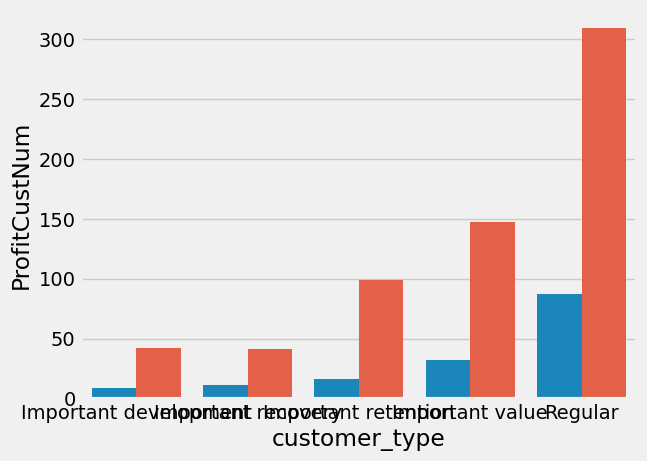

In [21]:
df_RFM['profit_type'] = (df_RFM.Profit>0)
df_ProfitCust= df_RFM.groupby(['customer_type','profit_type']).size().reset_index(name='ProfitCustNum')

sns.barplot(x='customer_type', y='ProfitCustNum', hue='profit_type', data=df_ProfitCust)
plt.title('profit condition of different customer type')
plt.xlabel('customer type')
plt.ylabel('num')
plt.xticks(rotation=45)
plt.show()

In [17]:
df_ProfitCust['profit_cust_sum'] = df_ProfitCust.groupby('customer_type')['ProfitCustNum'].transform(sum)
df_ProfitCust['profit_cust_rate'] = df_ProfitCust['ProfitCustNum']/df_ProfitCust['profit_cust_sum']
df_ProfitCust[df_ProfitCust['profit_type']==True].sort_values(by='profit_cust_rate', ascending=False)

,customer_type,profit_type,ProfitCustNum,profit_cust_sum,profit_cust_rate
5,Important retention,True,99,115,0.860870
1,Important development,True,42,51,0.823529
7,Important value,True,147,179,0.821229
3,Important recovery,True,41,52,0.788462
9,Regular,True,309,396,0.780303


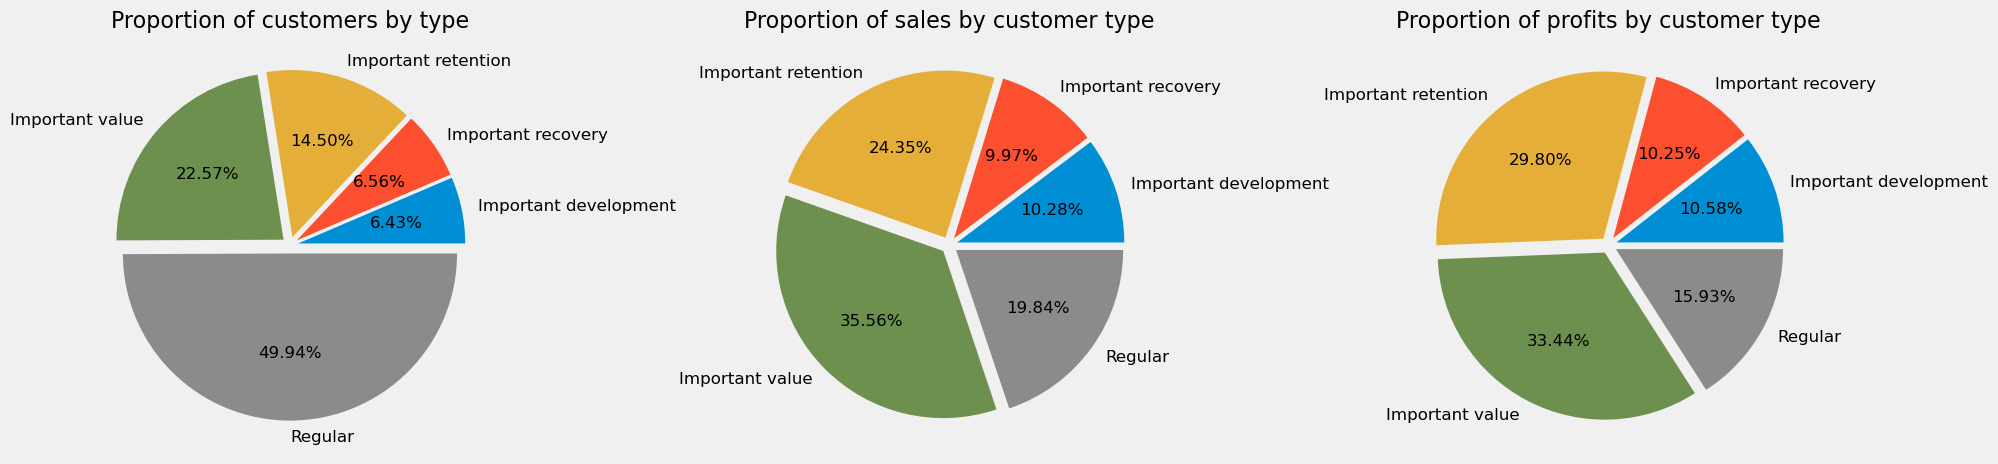

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(20,15), dpi=100)

labels=df_RFM.groupby('customer_type').customer_type.size().index
sizes=df_RFM.groupby('customer_type').customer_type.size()
explode = [0.05] * len(labels)
axes[0].pie(sizes, explode=explode, labels=labels, textprops={'fontsize': 12}, shadow=False, autopct='%.2f%%')
axes[0].set_title('Proportion of customers by type', fontsize=16)

sales_sum = df_RFM.groupby('customer_type')['Monetary'].sum()
axes[1].pie(sales_sum, explode=explode, labels=labels, textprops={'fontsize': 12}, shadow=False, autopct='%.2f%%')
axes[1].set_title('Proportion of sales by customer type', fontsize=16)

profit_sum = df_RFM.groupby('customer_type')['Profit'].sum()
axes[2].pie(profit_sum, explode=explode, labels=labels, textprops={'fontsize': 12}, shadow=False, autopct='%.2f%%')
axes[2].set_title('Proportion of profits by customer type', fontsize=16)

plt.tight_layout()
plt.show()

4.2 Analysis of new and old, active and returning users

The definition of new user is the first time consumption
Active users are regular customers who have made purchases in a certain time window.
Inactive users are regular customers who have not visited within the time window.
Returning users: repeat customers

In [19]:
df1 = df.drop_duplicates(subset=['Order ID'], keep='first')
pivoted_counts = df1.pivot_table(index='Customer Name',columns='order_year_month',values='Order Date',aggfunc='count').fillna(0)
pivoted_counts.head()

order_year_month,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
Customer Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron Bergman,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron Hawkins,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Aaron Smayling,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
Adam Bellavance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
Adam Hart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [20]:
df_purchase = pivoted_counts.applymap(lambda x:1 if x>0 else 0)
df_purchase.head()

order_year_month,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
Customer Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron Bergman,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Aaron Hawkins,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Aaron Smayling,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0
Adam Bellavance,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
Adam Hart,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,1,0


In [21]:
# function to determine whether it is a new, active, inactive or returning user
def active_status(data): # The entire row of data has 48 columns in total, which is a user’s 48-month consumption record.
    status = [] # Store user status for 48 months：unreg|new|active|unactive|return
    for i in range(48):
        # No consumption this month
        if data[i] == 0:
            if len(status) == 0: #There is no previous record
                status.append('unreg')
            else:  #Start judging the status of the previous month
                if status[i-1] == 'unreg': # Never consumed
                    status.append('unreg')
                else: # As long as there is no consumption this month, the current value is 0 and is not unreg. It can only be unactive.
                    status.append('unactive')
        # There is spend this month==1
        else:
            if len(status) == 0: #There is no previous record
                status.append('new')
            else:  #There has been a record before. Start to judge the status of the previous month.
                if status[i-1] == 'unactive': # No consumption last month
                    status.append('return')
                elif status[i-1] == 'unreg':  # Never consumed it before
                    status.append('new')    
                else:
                    status.append('active')
    return pd.Series(status,df_purchase.columns) 
    
purchase_states = df_purchase.apply(active_status,axis=1)  
purchase_states.head()


order_year_month,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
Customer Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron Bergman,unreg,new,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
Aaron Hawkins,unreg,unreg,unreg,new,active,unactive,unactive,unactive,unactive,return,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,return
Aaron Smayling,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive,return,active,active,unactive,unactive
Adam Bellavance,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,return,unactive
Adam Hart,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,return,unactive,unactive,return,unactive,unactive,unactive,return,active,unactive,unactive,unactive,return,active,active,unactive


In [22]:
purchase_states_ct = purchase_states.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
purchase_states_ct.head()

order_year_month,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
active,NaN,3.0,4.0,4,6,5,4,7,10,14,9,25,6,2,2,6,6,4,5,4,10,12,14,30,11,1,3,9,10,10,8,14,19.0,18,19,33,12.0,3.0,6,14,23.0,14,14,13.0,29,29,32,54.0
new,32.0,24.0,65.0,56,56,48,44,49,68,42,62,49,7,7,18,12,12,12,8,12,16,9,10,13,6,2,6,7,7,8,2,4,NaN,1,6,2,NaN,NaN,3,1,NaN,1,2,NaN,1,2,1,NaN
return,NaN,NaN,NaN,4,5,10,17,14,40,19,68,60,15,27,57,51,51,52,51,48,100,58,122,98,29,39,71,67,79,72,79,68,157.0,76,140,122,55.0,50.0,106,94,90.0,103,86,91.0,166,105,183,141.0
unactive,NaN,29.0,52.0,113,166,218,260,304,324,409,407,461,574,573,550,570,582,595,607,619,573,629,572,590,691,697,665,669,663,677,680,687,597.0,679,615,625,715.0,729.0,670,677,673.0,669,687,685.0,594,656,577,598.0


In [23]:
purchase_states_ct.T.fillna(0)

,active,new,return,unactive
order_year_month,,,,
2014-01,0.0,32.0,0.0,0.0
2014-02,3.0,24.0,0.0,29.0
2014-03,4.0,65.0,0.0,52.0
2014-04,4.0,56.0,4.0,113.0
2014-05,6.0,56.0,5.0,166.0
2014-06,5.0,48.0,10.0,218.0
2014-07,4.0,44.0,17.0,260.0
2014-08,7.0,49.0,14.0,304.0
2014-09,10.0,68.0,40.0,324.0


<Axes: xlabel='order_year_month'>

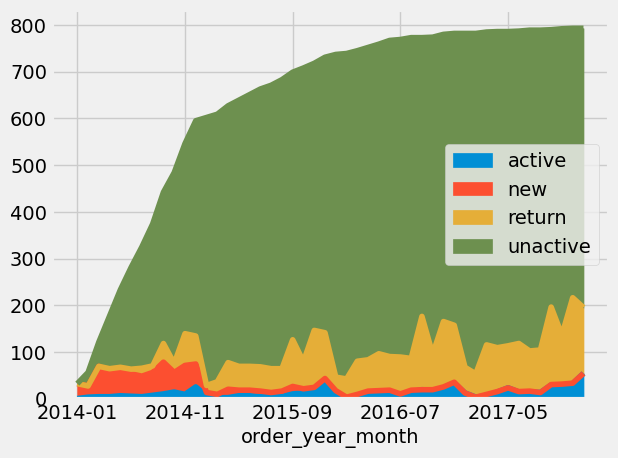

In [24]:
purchase_states_ct.T.fillna(0).plot.area()

From this table, you can see the number of active users (active), new users (new), returning users (return), and inactive users (unactive) every month. It can be seen that the number of active users increased in 2014, basically showing a cycle. At the same time, it can be seen that the number of returning users has remained at a relatively stable level throughout the entire time period, indicating that the store's return rate is relatively high, but the volatility is relatively large. The number of new users fluctuates greatly in different time periods. In the later period, there are basically no new users and may become saturated, indicating that the store needs to continuously develop new customers and adopt a variety of measures to attract users to return

Text(0.5, 1.0, 'return rate and active rate')

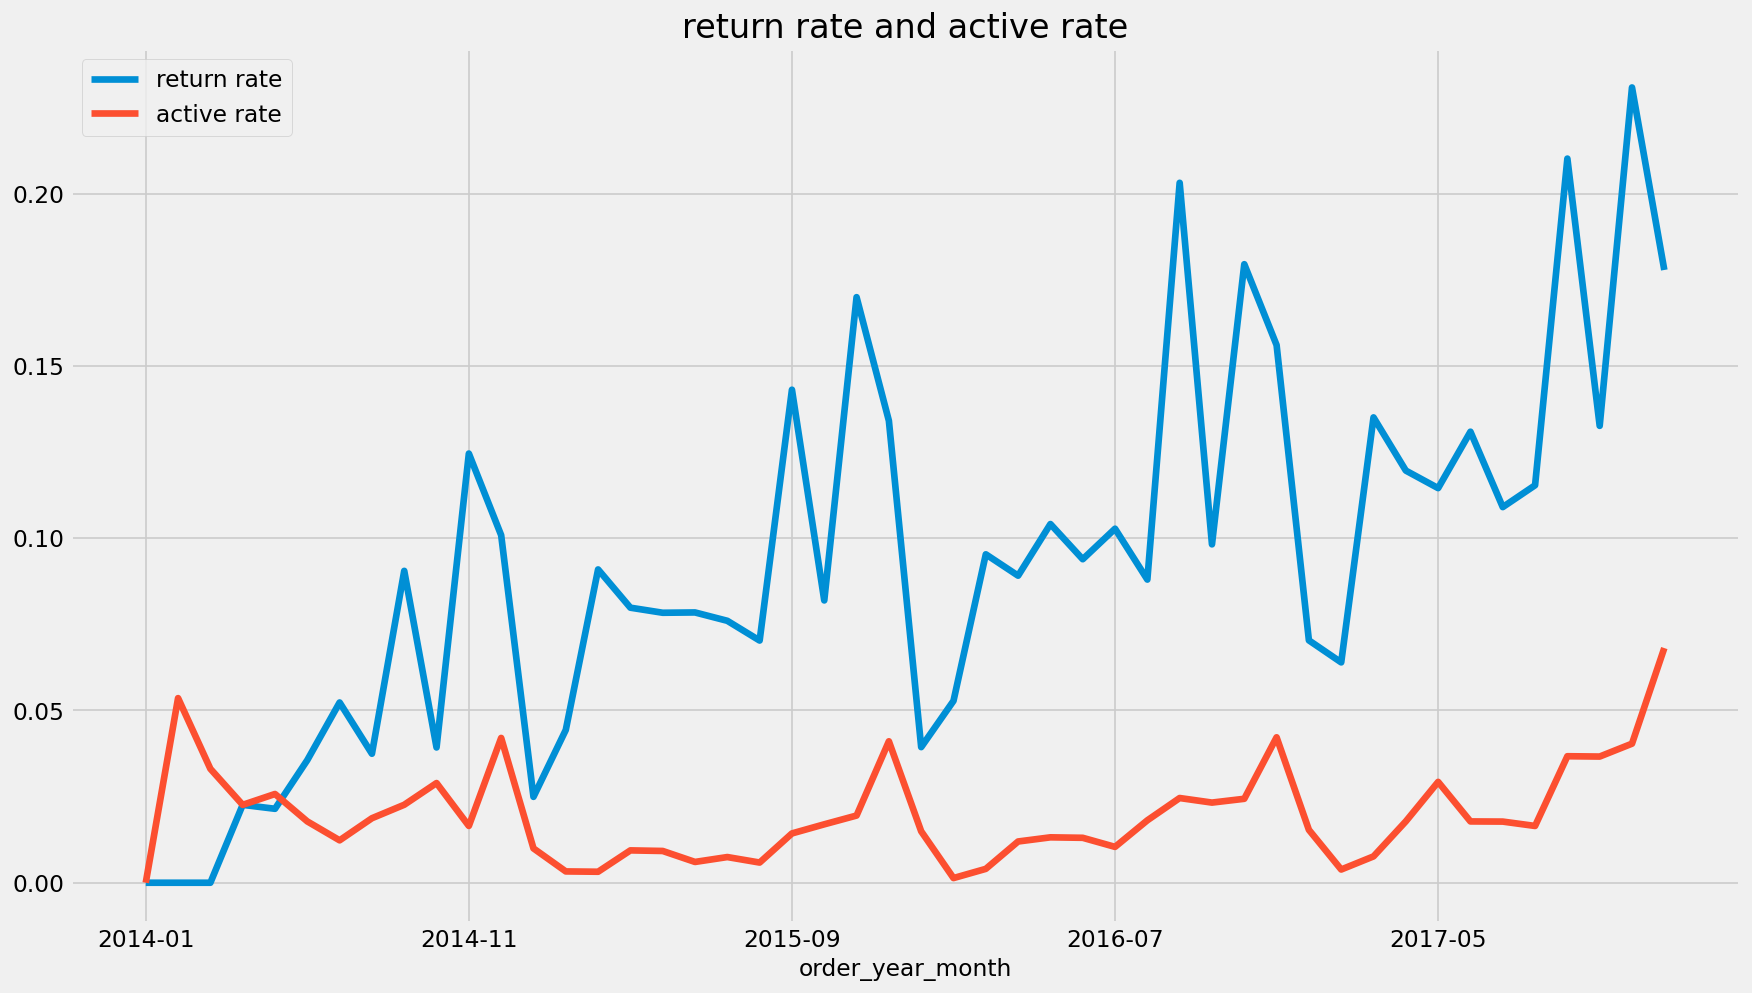

In [25]:
plt.figure(figsize=(16,9),dpi=120)
rate = purchase_states_ct.T.fillna(0).apply(lambda x:x/x.sum(),axis=1)
rate['return'].plot(label='return rate')
rate['active'].plot(label='active rate')
plt.legend()
plt.title('return rate and active rate')

Returning users are on the rise, but the volatility is relatively large. Active users increased significantly in 2017

In [26]:
order_diff = df1.groupby(by='Customer Name').apply(lambda x:abs(x['Order Date']-x['Order Date'].shift()).dt.days) 
order_diff.head()

#Shift index by the required number of periods with an optional time value

Customer Name      
Aaron Bergman  4961      NaN
               8222     17.0
               8801    996.0
Aaron Hawkins  3199      NaN
               3311    638.0
Name: Order Date, dtype: float64

In [27]:
order_diff.describe()

count    4216.000000
mean      478.191414
std       346.965438
min         0.000000
25%       178.000000
50%       411.000000
75%       726.000000
max      1422.000000
Name: Order Date, dtype: float64

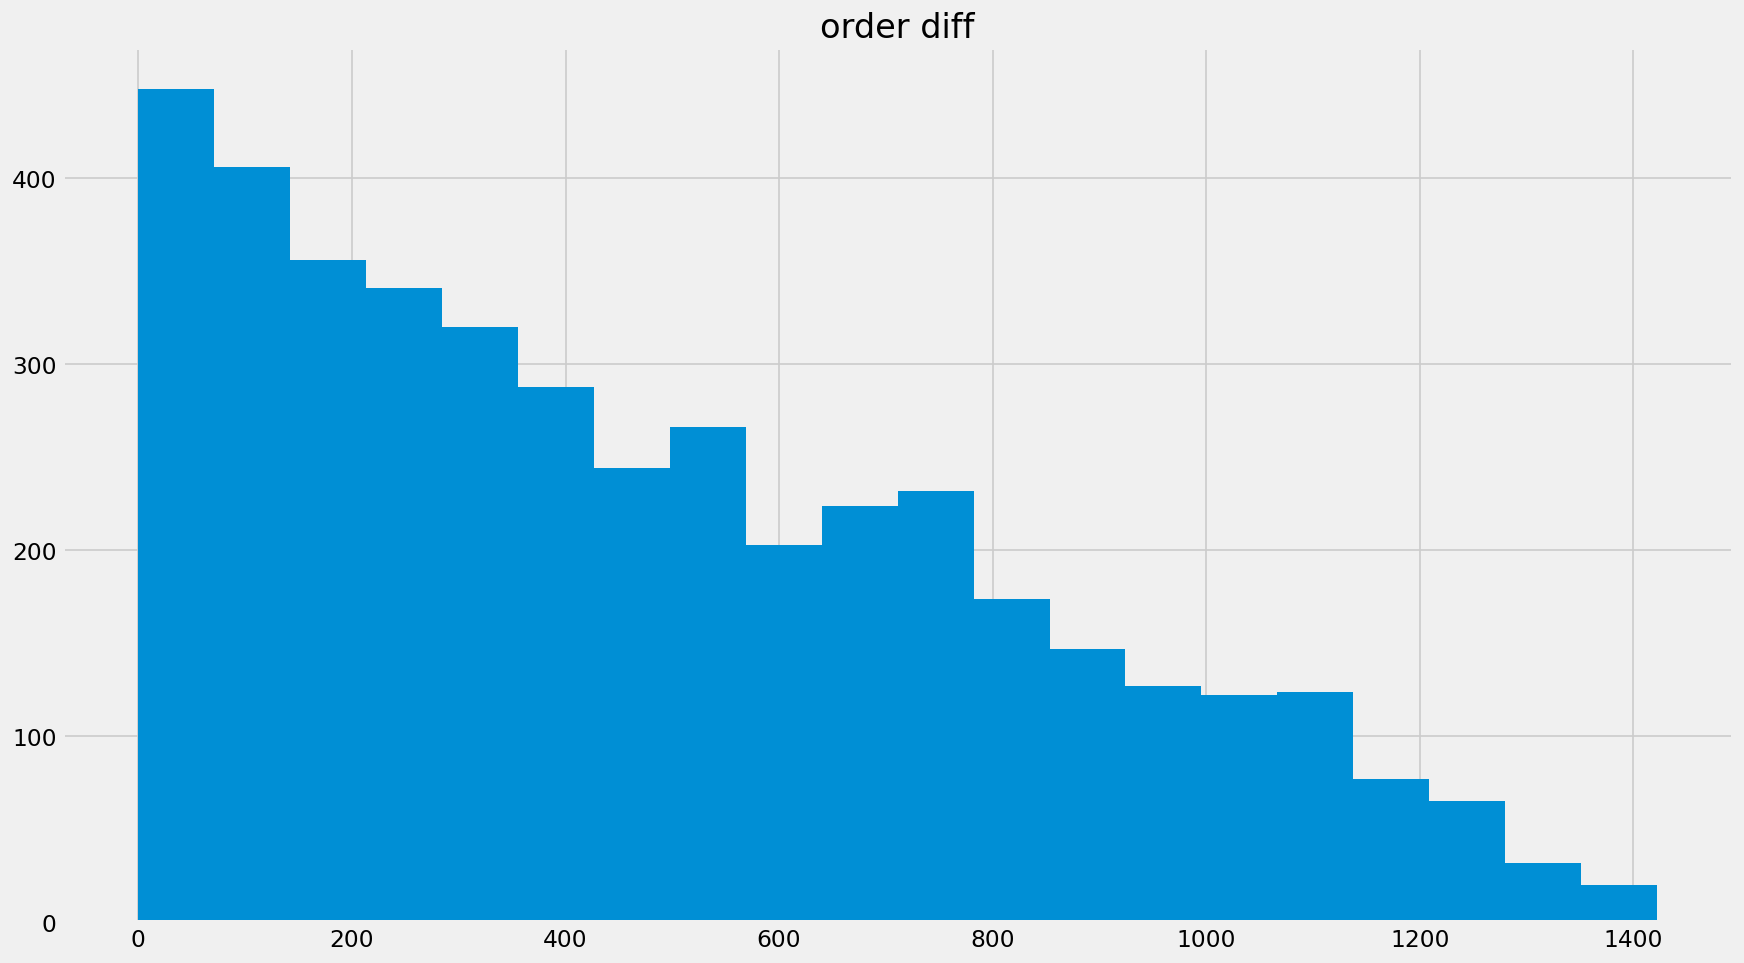

In [28]:
plt.figure(figsize=(16,9),dpi=120)
plt.hist(order_diff.dropna(),bins=20)
plt.title('order diff')
plt.show()

The average purchase cycle of users is 100 days, most of which are less than 150 days, and the number of people corresponding to the purchase cycle decreases with time. You can consider targeting customers with longer purchase cycles through targeted marketing and other methods to increase their purchasing behavior. At the same time, differentiated services and product recommendations can also be made for customers with short purchase cycles to increase their loyalty and purchase frequency

4.4 User life cycle analysis

Calculation method: The user’s last purchase - the date of the first purchase. If the difference = 0, it means the user only made one purchase

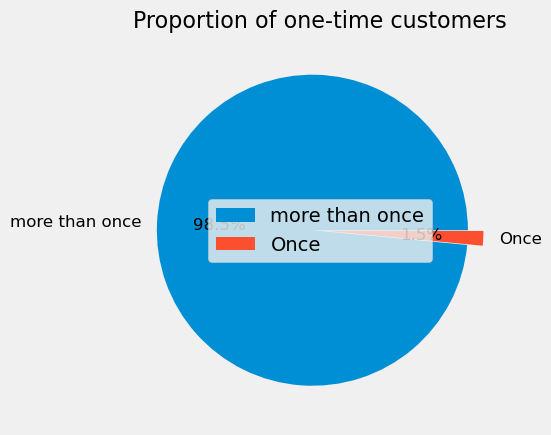

array([781,  12], dtype=int64)

In [29]:
user_life = df1.groupby(by='Customer Name')['Order Date'].agg(['min', 'max'])
user_life['life_time'] = (user_life['max'] - user_life['min']).dt.days
user_life_count = (user_life['max'] == user_life['min']).value_counts()
labels = ['more than once','Once']
sizes = user_life_count.values
explode = [0.05] * len(labels)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, textprops={'fontsize': 12}, shadow=False, autopct='%1.1f%%')
ax.set_title('Proportion of one-time customers', fontsize=16)
ax.legend(labels, loc='best')
plt.show()
sizes

It can be seen that all users have made purchases more than once, indicating that the store's user loyalty is high

In [30]:
user_life['life_time'].describe()

count     793.000000
mean      999.650694
std       309.869711
min         0.000000
25%       829.000000
50%      1092.000000
75%      1222.000000
max      1440.000000
Name: life_time, dtype: float64

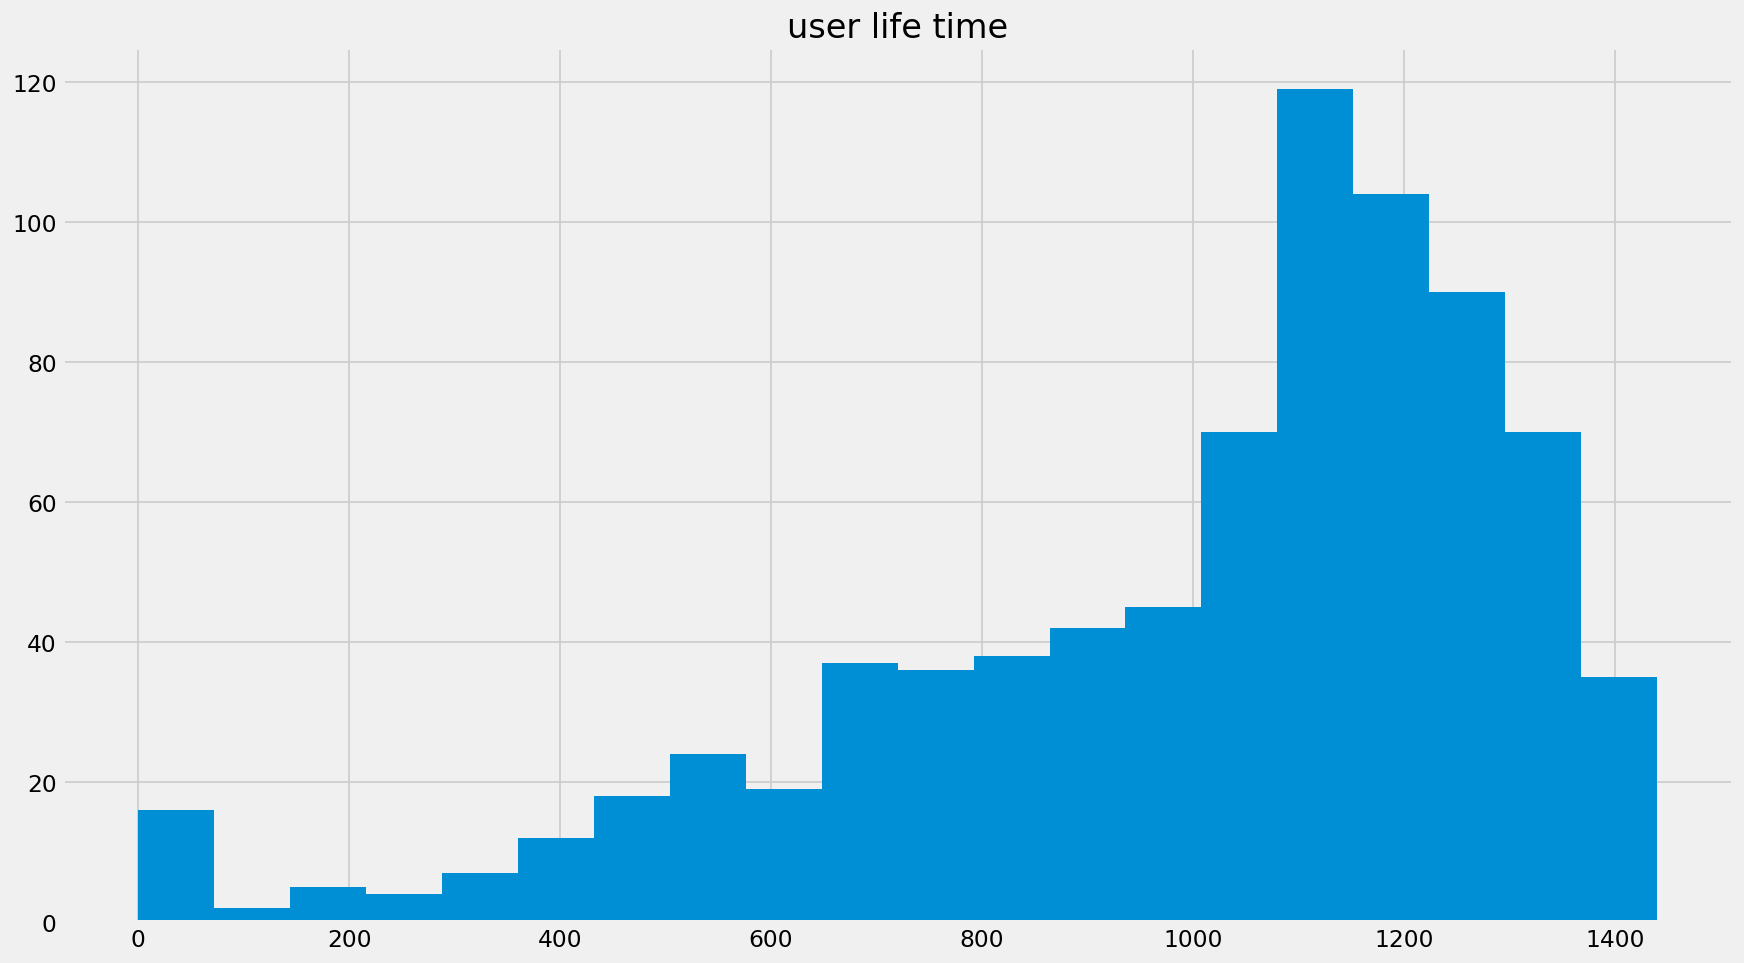

In [31]:
plt.figure(figsize=(16,9),dpi=120)
plt.hist(user_life['life_time'],bins=20)
plt.title('user life time')
plt.show()

The average user life cycle is 1343 days, and the median is 1361 days, which is about 4 years. max is 1458 days, which is 4 years, indicating that some customers have a longer life cycle, perhaps because their consumption needs are relatively fixed or their customer loyalty is high. Based on this information, it can be concluded that the life cycle of most of the store's customers is between 1 and 4 years, but there are also some customers with a longer life cycle. Different marketing strategies need to be adopted for different types of customers to promote their consumption, improve their loyalty

4.5 repurchase rate analysis

4.5.1 - Repurchase rate: Within a certain time window, the proportion of users who consume twice or more accounts for the total consuming users. Here we use each month as the time window to calculate the monthly repurchase rate.

Calculation method: In a natural month, the proportion of users who purchase multiple times among the total number of consumers (multiple purchases on the same day are also counted)

There are three types of consumers: 1. Consumption multiple times this month (repurchase) 2. Consumption once 3. No consumption this month

Repeat purchase: 1 Non-repurchase and consumption: 0 No consumption: NAN (does not participate in the count)

Text(0.5, 1.0, 'repurchase rate')

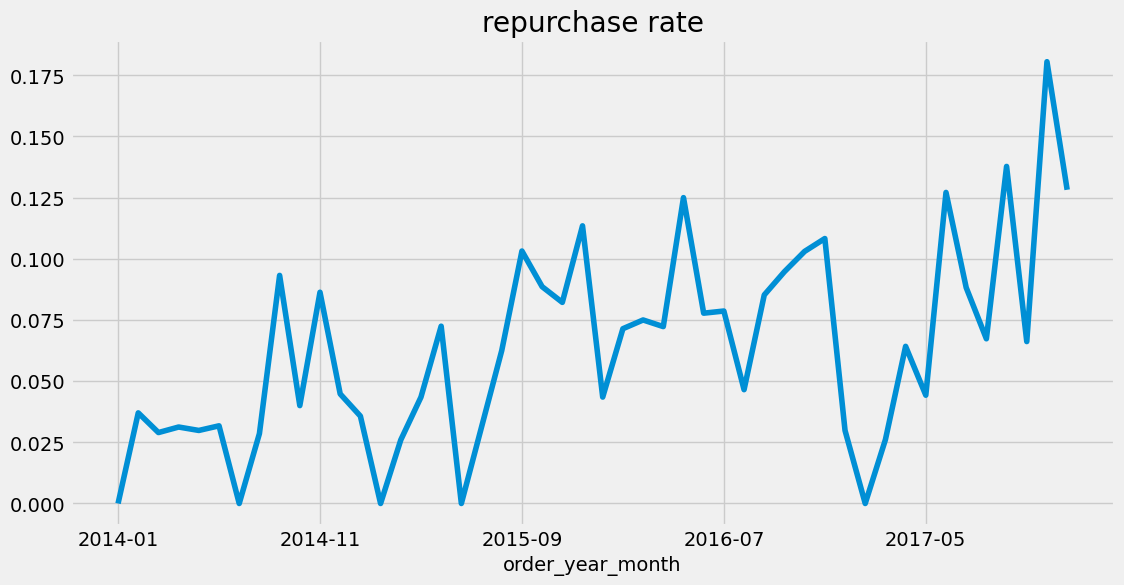

In [32]:
purchase_r = pivoted_counts.applymap(lambda x:1 if x>1 else np.NaN if x==0 else 0)
purchase_r.head()
# purchase_r.sum() Find repeat purchase users
# purchase_r.count() Find all users participating in consumption
(purchase_r.sum()/purchase_r.count()).plot(figsize=(12,6)) 
plt.title('repurchase rate') 

The overall trend of repurchase rate is increasing

4.5.2 - Repeated rate: The proportion of users who consume once in a certain time window and consume again in the next time window. Here we use each month as the time window to calculate the monthly repurchase rate

Calculation method: consumption is carried out within a time window, and consumption is carried out in the next window

1: Repeated users: consumed in the current month and consumed again in the next month
0: consumed in the current month but did not consume in the next month nan: did not consume in the current month

In [33]:
def purchase_back(data):
    status = [] 
    for i in range(47):
        if data[i] == 1:
            if data[i+1] ==1:
                status.append(1) 
            elif data[i+1] == 0:
                status.append(0) 
        else:
            status.append(np.NaN)
    status.append(np.NaN)  
    return pd.Series(status,df_purchase.columns)
purchase_b = df_purchase.apply(purchase_back,axis=1)
purchase_b.head()

order_year_month,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
Customer Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron Bergman,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Hawkins,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Smayling,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN
Adam Bellavance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
Adam Hart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,1.0,1.0,0.0,NaN


Text(0.5, 1.0, 'repeat purchase num and purchase num')

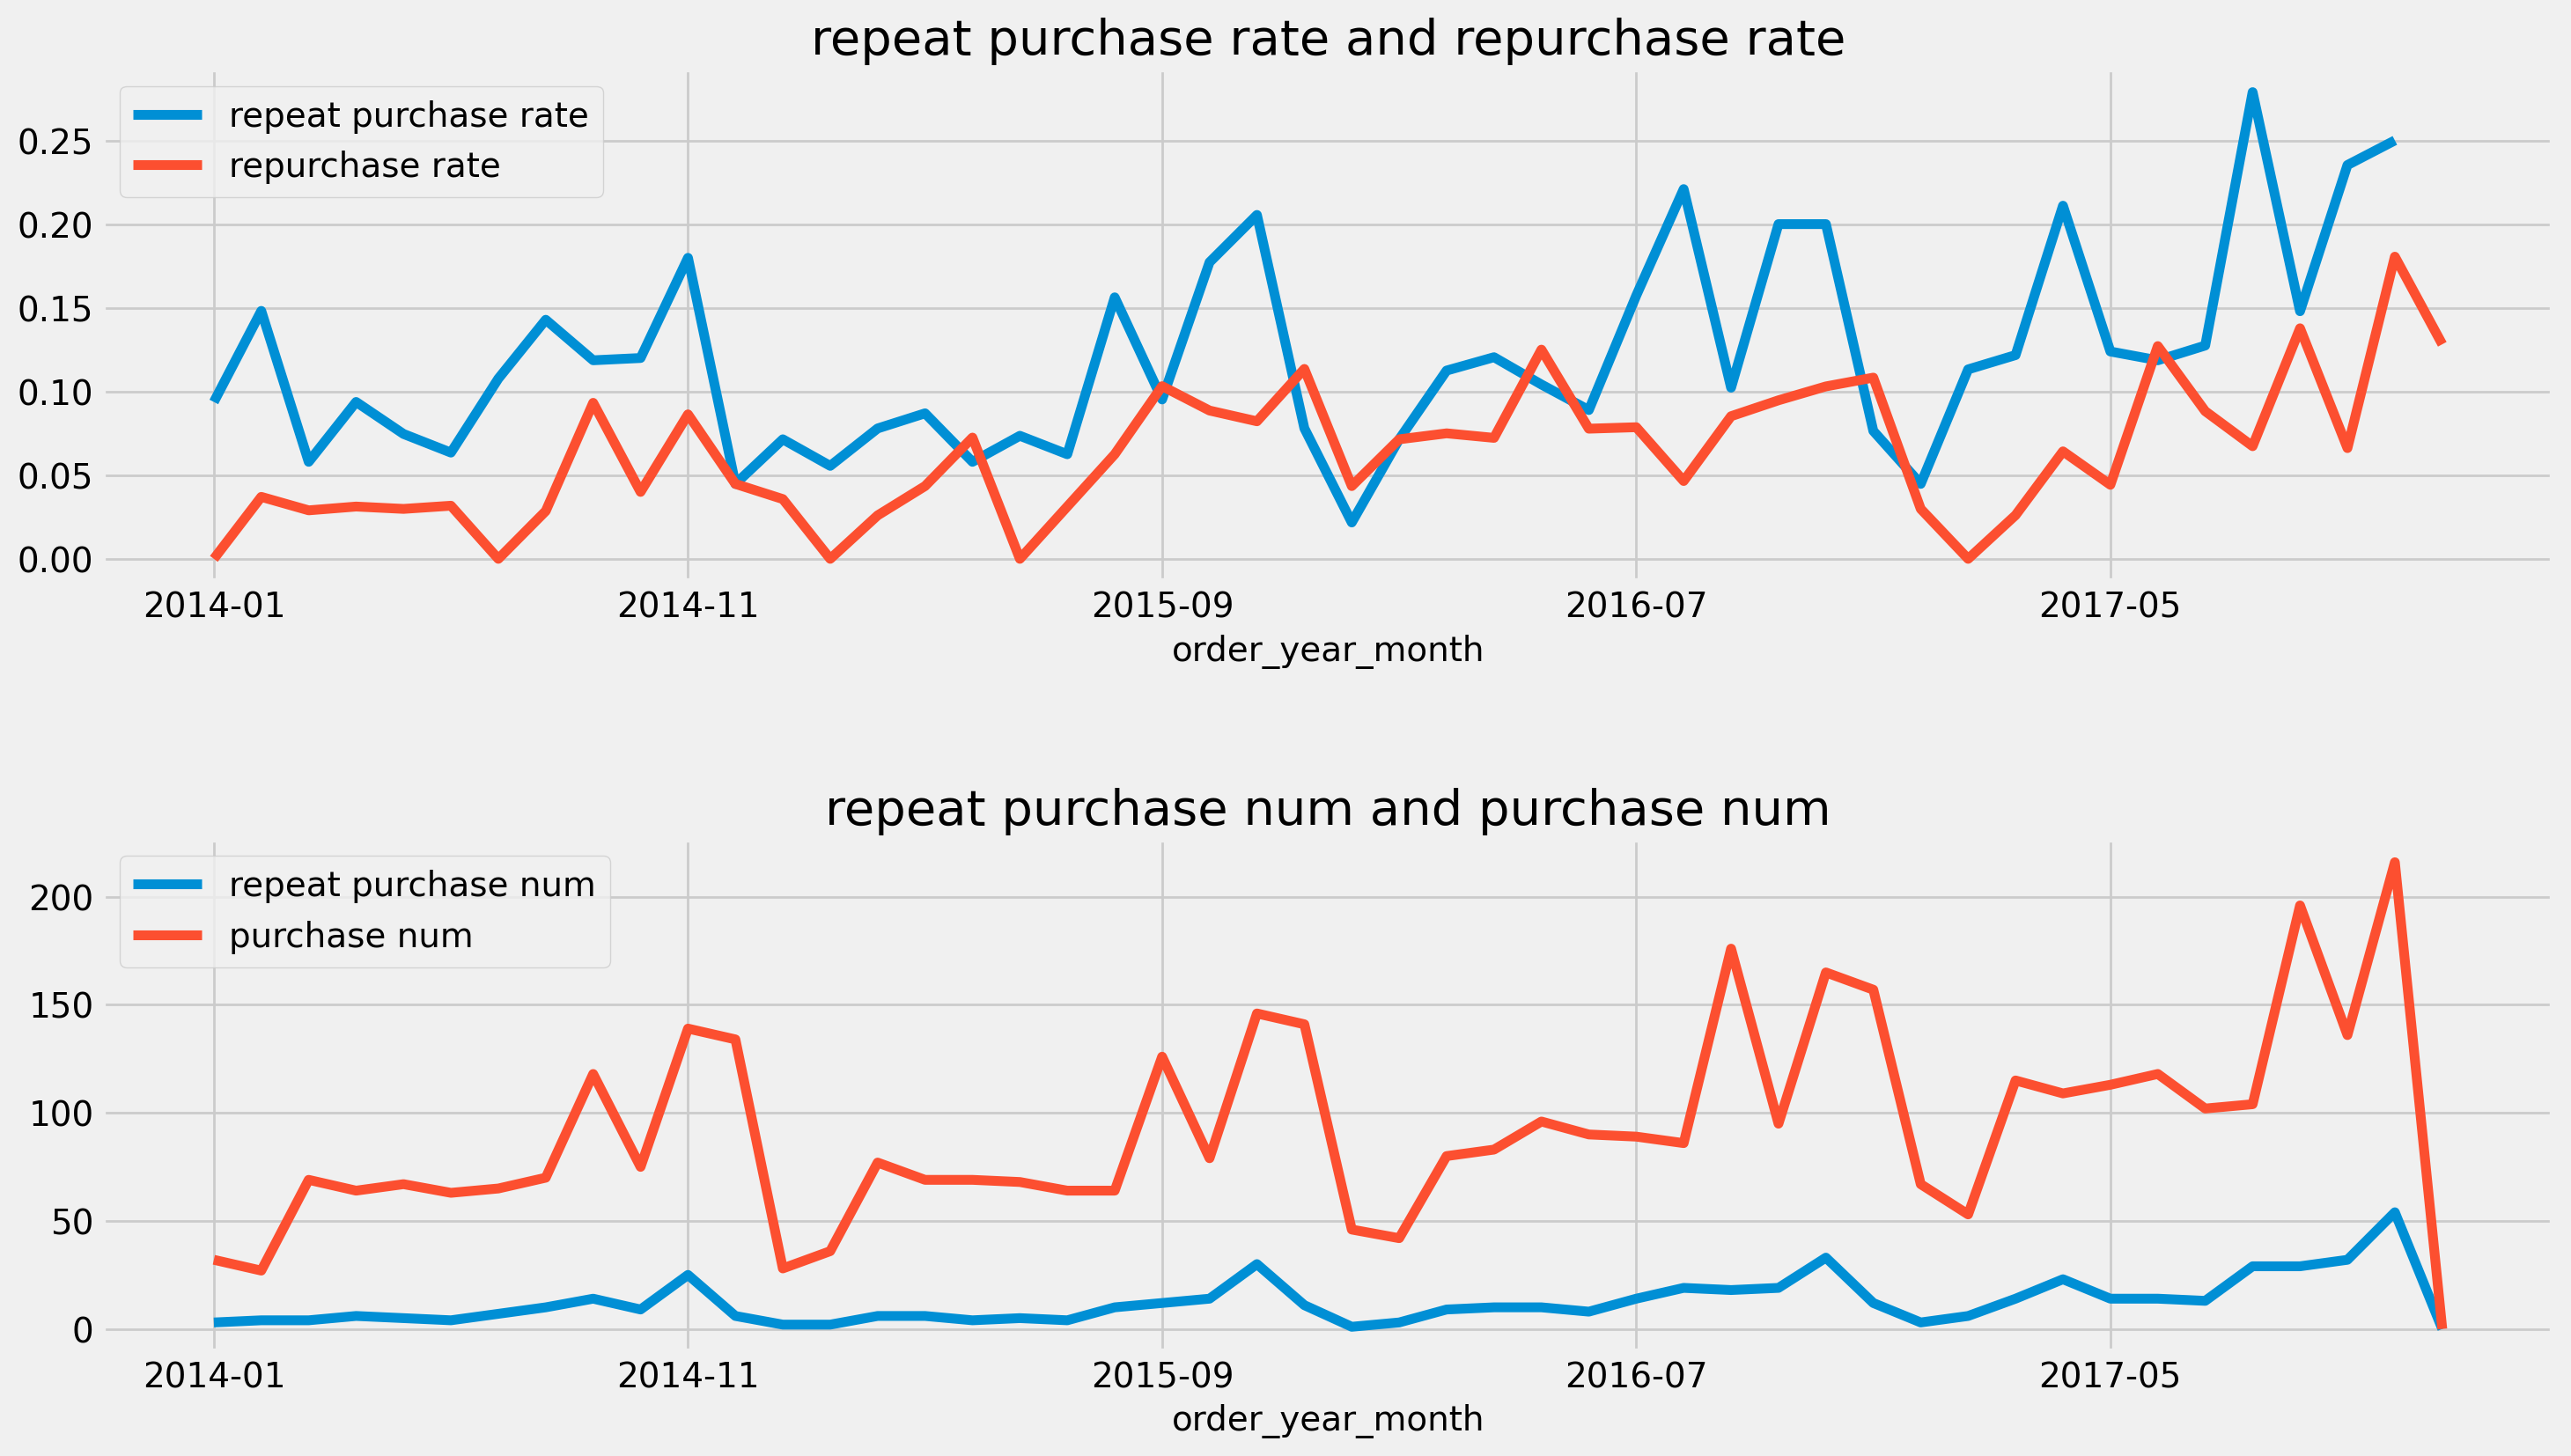

In [34]:
plt.figure(figsize=(16,9),dpi=200)
plt.subplot(211)
# Repeated purchase rate
(purchase_b.sum()/ purchase_b.count()).plot(label='repeat purchase rate')
# Repurchase rate
(purchase_r.sum()/purchase_r.count()).plot(label='repurchase rate')
plt.legend()
plt.title('repeat purchase rate and repurchase rate')

plt.subplots_adjust(hspace=0.5) 

# Number of repurchases and total number of customers
plt.subplot(212)
purchase_b.sum().plot(label='repeat purchase num')
purchase_b.count().plot(label='purchase num')
plt.legend()
plt.title('repeat purchase num and purchase num')

The repeat purchase rate and repurchase rate fluctuate greatly, but they basically reached their peak in 2017, indicating that the store's user retention rate in 2017 was relatively high, and some marketing strategies can be used to promote users' repeat purchase and repurchase rates.